# Machine Learning project
Predict the average house price of a given area in Taipei city. This may help real estate agent to better valuate a property in a given area or might help anyone interested in house prices, make better decision in buying a house or renting.

### Type: Regression

## Approach
* Data loading, cleaning and feature engineering.
* Split the data into train and test set
* Train sevaral models and tune the best model.
* Save & Deploy the best model to a web application.

In [1]:
# importing neccesary libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## Data Loading, Preprocessing, Inspection and Feature engineering

In [3]:
# loads the data
file= pd.ExcelFile('data/real_estate_valuation.xlsx')
file.sheet_names

['data', 'description']

In [4]:
data= file.parse('data')
df= data.copy()

In [5]:
print("Number of columns: ",df.shape[1])
print("Number of rows: ", df.shape[0])

Number of columns:  8
Number of rows:  414


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


In [9]:
df.iloc[:, 1:].describe().round(2) # summary statistics

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.00,414.00,414.00,414.00,414.00,414.00,414.00
mean,2013.15,17.71,1083.89,4.09,24.97,121.53,37.98
std,0.28,11.39,1262.11,2.95,0.01,0.02,13.61
min,2012.67,0.00,23.38,0.00,24.93,121.47,7.60
25%,2012.92,9.02,289.32,1.00,24.96,121.53,27.70
50%,2013.17,16.10,492.23,4.00,24.97,121.54,38.45
75%,2013.42,28.15,1454.28,6.00,24.98,121.54,46.60
max,2013.58,43.80,6488.02,10.00,25.01,121.57,117.50


In [10]:
# checking for missing values
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [11]:
# rename columns
columns = ['No.','transaction date', 'house age', 
           'dist to nearest MRT', 'number of convenience stores',
          'latitude', 'longitude', 'house price of unit area']

df.columns = columns

# Changing Date Format and Creating Date Releated Features

In [12]:
df['transaction date'] = np.round(df['transaction date'], 3)

In [13]:
# change the decimal years format to standard date.

from datetime import datetime, timedelta
def convert(number):
    
    year= int(number)
    d = timedelta(days= (number - year)*365)
    day1 = datetime(year, 1, 1)
    date = d+day1
    return date

df['date-time'] = [convert(i) for i in df['transaction date'] ]

In [14]:
# date features
# creates new variables of date components
df['transaction_year'] = df['date-time'].dt.strftime('%Y')
df['transaction_month'] = df['date-time'].dt.strftime('%B')
df['transaction_dayname'] = df['date-time'].dt.strftime('%A')

In [15]:
df.drop('transaction date', axis=1, inplace=True)

In [16]:
df.head()

,No.,house age,dist to nearest MRT,number of convenience stores,latitude,longitude,house price of unit area,date-time,transaction_year,transaction_month,transaction_dayname
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,2012-11-30 16:55:11.999997,2012,November,Friday
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,2012-11-30 16:55:11.999997,2012,November,Friday
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,2013-08-01 19:04:48.000003,2013,August,Thursday
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,2013-07-02 12:00:00.000000,2013,July,Tuesday
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,2012-10-31 01:04:48.000003,2012,October,Wednesday


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   No.                           414 non-null    int64         
 1   house age                     414 non-null    float64       
 2   dist to nearest MRT           414 non-null    float64       
 3   number of convenience stores  414 non-null    int64         
 4   latitude                      414 non-null    float64       
 5   longitude                     414 non-null    float64       
 6   house price of unit area      414 non-null    float64       
 7   date-time                     414 non-null    datetime64[ns]
 8   transaction_year              414 non-null    object        
 9   transaction_month             414 non-null    object        
 10  transaction_dayname           414 non-null    object        
dtypes: datetime64[ns](1), float64(5)

<h3>HOUSE PRICES BY LOCATION </h3><br>
<img src = 'images/house-prices-across the district.png' width='550' height='550' align='left'>

# Check for normality

In [18]:
list(df.select_dtypes('number'))

['No.',
 'house age',
 'dist to nearest MRT',
 'number of convenience stores',
 'latitude',
 'longitude',
 'house price of unit area']

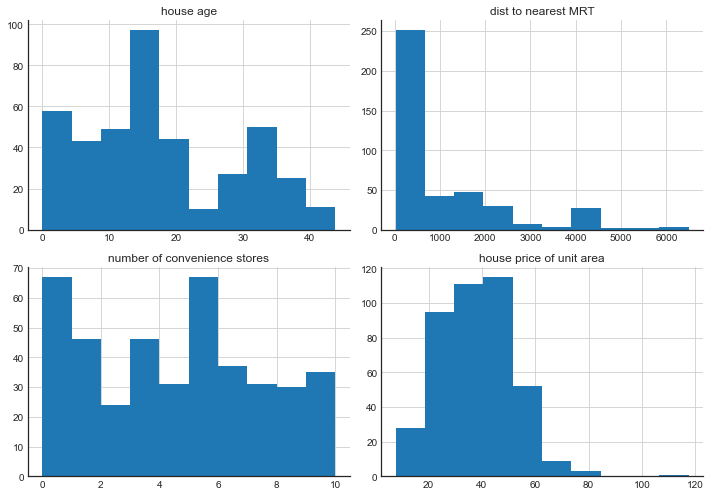

In [19]:
# makes histogram plots of each numeric columns
f, hist_ax = plt.subplots(figsize = (10, 7))
df[['house age', 'dist to nearest MRT', 'number of convenience stores',
         'house price of unit area']].hist(density=False, ax=hist_ax);
plt.tight_layout()
sns.despine()

# check for outliers and extreme values

In [20]:
numeric_columns= list(df.select_dtypes('number').iloc[:, [1,2,3,6]])
numeric_columns

['house age',
 'dist to nearest MRT',
 'number of convenience stores',
 'house price of unit area']

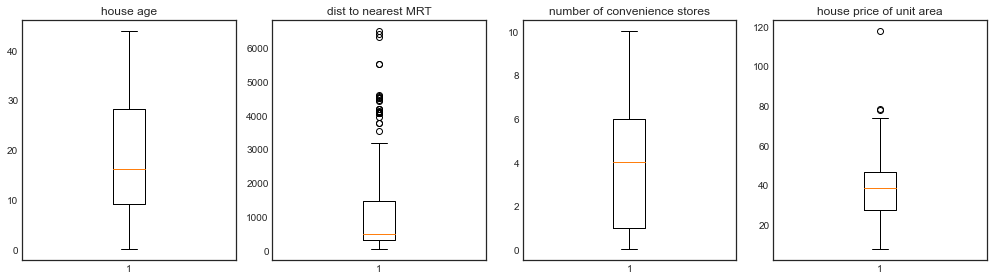

In [21]:
# making boxplot to check for outliers in the data
box_fig = plt.figure(figsize=(14, 4))
for index, col in enumerate(numeric_columns):
    plt.subplot(1,4,index+1)
    plt.tight_layout()
    plt.boxplot(df[col])
    plt.title(col)

We can see that **dist to nearest MRT** is highly skewed with couple of outliers, the same goes to **house price per unit area.**<br>
The outlier problem is solved by normalizing the data.

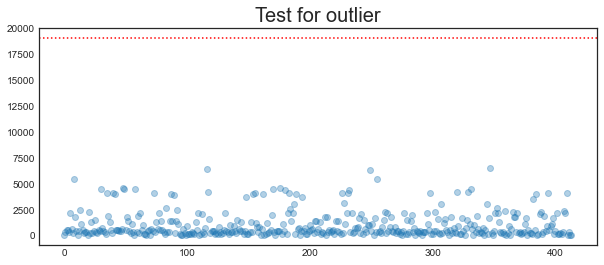

In [22]:
#check for outliers
# using modified zscore

import fun1
fun1.makeplot(df['dist to nearest MRT'])

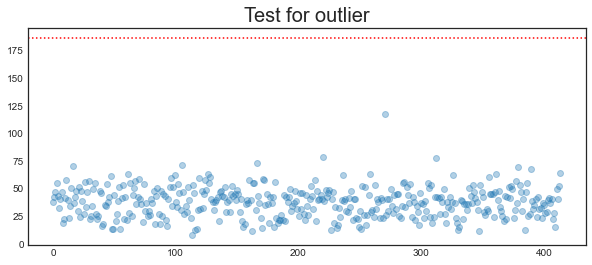

In [23]:
fun1.makeplot(df['house price of unit area'])

## check for correlations & relationships

Text(0.5, 1.0, 'Correlation between variables')

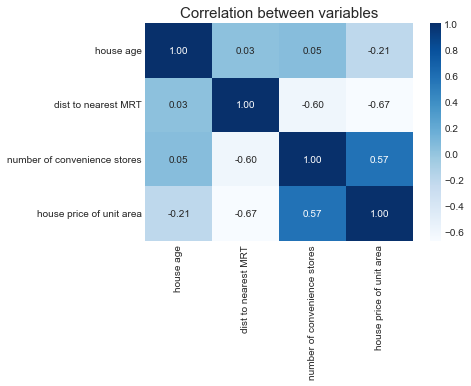

In [24]:
sns.heatmap(data=df[numeric_columns].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation between variables', size=15)

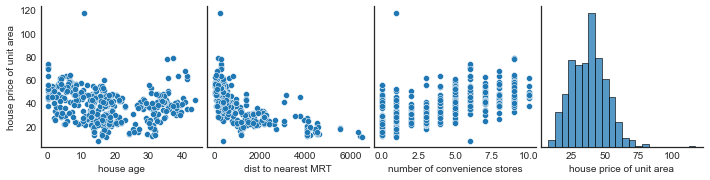

In [25]:
sns.pairplot(df, y_vars= ['house price of unit area'], x_vars= numeric_columns)

In [26]:
# remove outlier from the data
df1 = df[~(df['house price of unit area'] >=110)]

In [27]:
print('data with outlier shape ', df.shape)
print('Data with no outlier (shape) ', df1.shape)

data with outlier shape  (414, 11)
Data with no outlier (shape)  (413, 11)


# Extra Features Engineering

In [28]:
df1['dist to nearest MRT'].describe()

count     413.000000
mean     1085.898530
std      1262.974876
min        23.382840
25%       289.324800
50%       492.231300
75%      1455.798000
max      6488.021000
Name: dist to nearest MRT, dtype: float64

In [29]:
df['house age'].describe()

count    414.000000
mean      17.712560
std       11.392485
min        0.000000
25%        9.025000
50%       16.100000
75%       28.150000
max       43.800000
Name: house age, dtype: float64

In [30]:
np.linspace(22, 6488, 6)

array([  22. , 1315.2, 2608.4, 3901.6, 5194.8, 6488. ])

In [31]:
df1['house age bins']= np.where(df1['house age'].between(0, 15, inclusive='left'), '0-15', '')
df1['house age bins']= np.where(df1['house age'].between(15, 30, inclusive='left'), '16-30', df1['house age bins'])
df1['house age bins']= np.where(df1['house age'].between(30, 45, inclusive='both'), '31-45', df1['house age bins'])

In [32]:
df1['dist of MRT bins']= np.where(df1['dist to nearest MRT'].between(22, 1316, inclusive='left'), '22m to 1315m', '')
df1['dist of MRT bins']= np.where(df1['dist to nearest MRT'].\
                                  between(1316, 2608, inclusive='left'), '1316m to 2607m', df1['dist of MRT bins'])

df1['dist of MRT bins']= np.where(df1['dist to nearest MRT'].\
                                  between(2608, 3902, inclusive='left'), '2608m to 3901m', df1['dist of MRT bins'])

df1['dist of MRT bins']= np.where(df1['dist to nearest MRT'].\
                                  between(3902, 5195, inclusive='left'), '3902m to 5194m', df1['dist of MRT bins'])

df1['dist of MRT bins']= np.where(df1['dist to nearest MRT'].\
                                  between(5195, 6500, inclusive='both'), '5195m to 6500m', df1['dist of MRT bins'])

In [33]:
df1.head()

,No.,house age,dist to nearest MRT,number of convenience stores,latitude,longitude,house price of unit area,date-time,transaction_year,transaction_month,transaction_dayname,house age bins,dist of MRT bins
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,2012-11-30 16:55:11.999997,2012,November,Friday,31-45,22m to 1315m
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,2012-11-30 16:55:11.999997,2012,November,Friday,16-30,22m to 1315m
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,2013-08-01 19:04:48.000003,2013,August,Thursday,0-15,22m to 1315m
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,2013-07-02 12:00:00.000000,2013,July,Tuesday,0-15,22m to 1315m
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,2012-10-31 01:04:48.000003,2012,October,Wednesday,0-15,22m to 1315m


<AxesSubplot:title={'center':'House Age Bins'}>

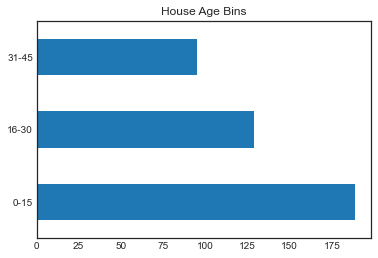

In [34]:
df1['house age bins'].value_counts().plot(kind='barh',title='House Age Bins')

<AxesSubplot:title={'center':'Distance to nearest MRT station bins'}>

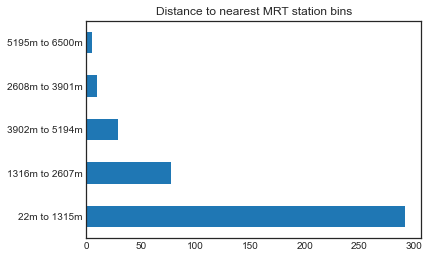

In [35]:
df1['dist of MRT bins'].value_counts().plot(kind='barh', title='Distance to nearest MRT station bins')

# Model Building step

In [36]:
# all necessary packages to aid in the model building processes
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error # root mean square error
#from yellowbrick.model_selection import LearningCurve

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [37]:
df1.drop(['date-time'], axis=1, inplace=True)

In [38]:
df1.head()

,No.,house age,dist to nearest MRT,number of convenience stores,latitude,longitude,house price of unit area,transaction_year,transaction_month,transaction_dayname,house age bins,dist of MRT bins
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,2012,November,Friday,31-45,22m to 1315m
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,2012,November,Friday,16-30,22m to 1315m
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,2013,August,Thursday,0-15,22m to 1315m
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,2013,July,Tuesday,0-15,22m to 1315m
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,2012,October,Wednesday,0-15,22m to 1315m


In [39]:
list(df1)

['No.',
 'house age',
 'dist to nearest MRT',
 'number of convenience stores',
 'latitude',
 'longitude',
 'house price of unit area',
 'transaction_year',
 'transaction_month',
 'transaction_dayname',
 'house age bins',
 'dist of MRT bins']

In [40]:
cols = [
 'house age',
 'dist to nearest MRT',
 'number of convenience stores',
 'latitude',
 'longitude',
 'transaction_year',
 'transaction_month',
 'transaction_dayname',
 'house age bins',
 'dist of MRT bins']


X, y = df1[cols], df1['house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, test_size=.3)

In [41]:
# A code to print out various scores for each model..

# various algorithms
lm= LinearRegression()
rfr = RandomForestRegressor(max_depth=50, max_features=12, max_samples=4)
lassr = Lasso()
dtr= DecisionTreeRegressor(max_features=20, max_depth=100)
svr = SVR()
ridge = Ridge()

cat = ['transaction_year', 
       'transaction_month', 
       'transaction_dayname', 
       'number of convenience stores',
       'house age bins',
       'dist of MRT bins'
      ]
num = ['house age', 'dist to nearest MRT', 'latitude', 'longitude']

ohe = OneHotEncoder()
sc = StandardScaler()

col_trans = ColumnTransformer([('encoder', ohe, cat), 
                               ('scaler',sc, num)])

models= [lm, rfr, dtr, svr, lassr, ridge]
names = ['linear regression', 'random forest', 'decision tree', 'svr', 'lasso', 'ridge']

reports = []
predictions = []
modelsPipe = []

for pipe, name in zip(models, names):
    pipe = Pipeline(steps=[('column_transformer', col_trans), ('regressor', pipe)])
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae= mean_absolute_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    
    report= pd.Series({'R2-score ':r2, 
                      'Mean Square Error': mse, 
                      'Mean Absolute Error': mae, 
                      'Root Mean Square Error': rmse}, name= name.upper())
    
    reports.append(report,)
    predictions.append(y_pred)
    modelsPipe.append(pipe)

REPORT = []
for i in np.arange(0, 6):
    r = reports[i]
    REPORT.append(r)

In [42]:
pd.DataFrame(REPORT).T

,LINEAR REGRESSION,RANDOM FOREST,DECISION TREE,SVR,LASSO,RIDGE
R2-score,0.599311,0.301584,0.544885,0.489464,0.455986,0.601665
Mean Square Error,68.880911,120.062072,78.237016,87.764327,93.519462,68.476173
Mean Absolute Error,5.981189,8.585706,6.247581,6.733785,7.266041,5.941390
Root Mean Square Error,8.299452,10.957284,8.845169,9.368262,9.670546,8.275033


## Comparing Predictions of each model

In [43]:
# A code to compare the predictions of each model..
dictionary = {}
names = ['linear regression', 'random forest', 'decision tree', 'svr', 'lasso', 'ridge']

for name, i in zip(names, np.arange(0, 7)):
    preds = predictions[i]
    dictionary[name] = preds   
    
pd.DataFrame(dictionary, index= y_test).head(10)

,linear regression,random forest,decision tree,svr,lasso,ridge
house price of unit area,,,,,,
40.5,50.307394,41.8775,53.9,44.412621,44.097427,50.633882
33.1,42.452674,40.7620,37.3,42.077640,43.695819,42.823949
56.8,50.503247,41.2495,57.8,40.579870,41.986926,49.903545
61.9,53.230086,42.2775,54.4,45.028695,46.261036,53.227970
45.5,48.044676,41.3085,56.2,45.325353,44.314764,48.086354
63.2,53.048013,42.3565,47.9,45.365807,44.858693,52.535458
40.6,40.618587,38.7630,36.5,39.230179,39.937121,40.532424
15.6,9.782325,32.8850,19.2,21.432495,14.760330,11.072233
47.7,46.997249,41.4755,53.9,44.865471,42.709449,48.047427


## Model evaluation

In [44]:
# a code to visualize the scores of the model
k = KFold(n_splits=7)

model_name = ['linear regression', 'random forest', 'decision tree', 'SVR', 'lasso', 'ridge']
mae_= []
r2_= []

for model in modelsPipe:
        mae= cross_val_score(model, X_train, y_train, cv=k, scoring='neg_mean_absolute_error')
        mae_.append(mae)
        
        r2= cross_val_score(model, X_train, y_train, cv=k, scoring='r2')
        r2_.append(r2)   
        
cv_scores_mae = pd.DataFrame(mae_, index=model_name).T
cv_scores_r2 = pd.DataFrame(r2_, index=model_name).T

<AxesSubplot:title={'center':'negative MAE'}>

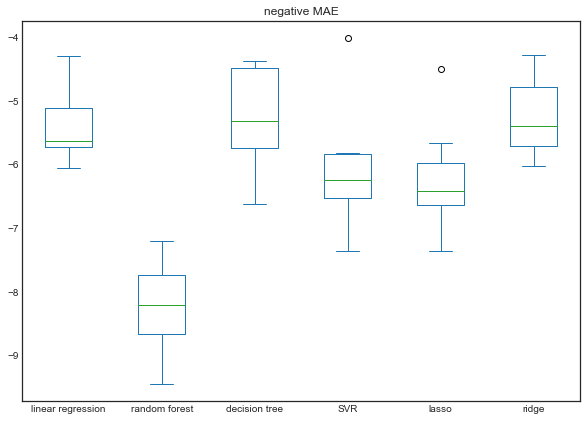

In [45]:
cv_scores_mae.plot(kind= 'box', figsize=(10, 7), title='negative MAE')

<AxesSubplot:title={'center':'R-Square'}>

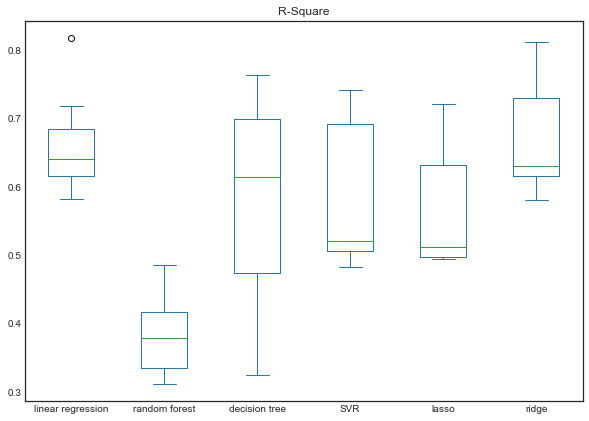

In [46]:
cv_scores_r2.plot(kind='box', figsize=(10, 7), title='R-Square')

# Model Predictions Before Tuning

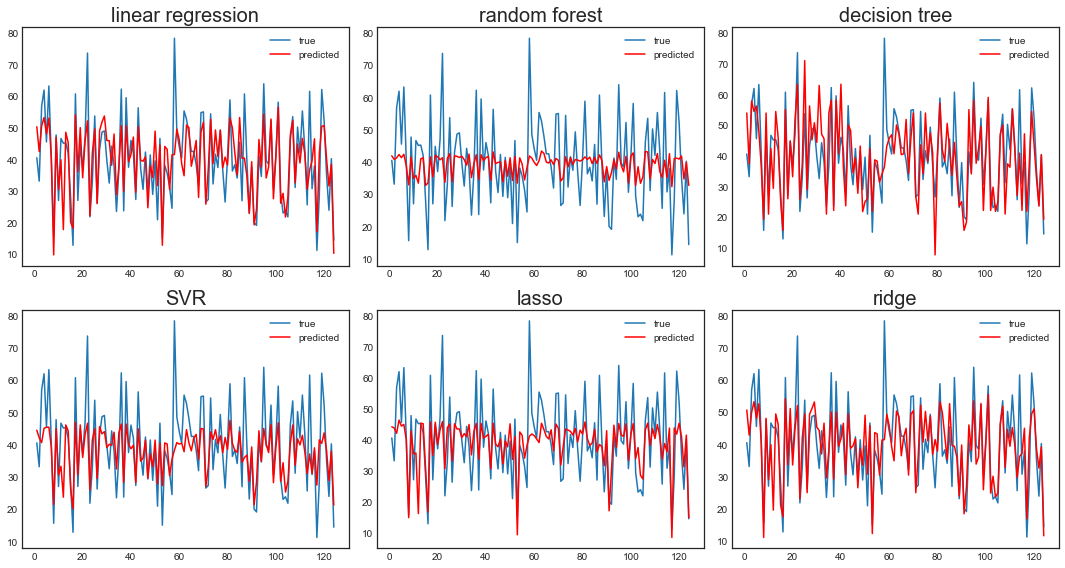

In [47]:
# compare each model performance on the test set
plt.figure(figsize= (15, 8))
for pred, names in zip(enumerate(predictions), model_name):
    plt.subplot(2, 3, pred[0]+1)
    plt.tight_layout()
    plt.plot(range(1, len(X_test)+1), y_test, label= 'true')
    plt.plot(range(1, len(X_test)+1), pred[1], color ='red', label= 'predicted')
    plt.title(str(names), size=  20)
    plt.legend()

## Tuning using Gridsearch 

In [48]:
# we re-train decision tree regressor and  (using gridsearch)
ridge_pipe = Pipeline(steps=[('transformer', col_trans), ('reg', Ridge())])
param_grid = {
    'reg__alpha': [1, 0.5, 0.05,0.005, 0.0005, 0.00005],
    'reg__solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}
search0 = GridSearchCV(ridge_pipe, param_grid, n_jobs=-1)
search0.fit(X_train, y_train);

In [49]:
lasso_pipe = Pipeline(steps=[('transformer', col_trans), ('reg', Lasso())])

param_grid = {
    'reg__alpha': [1, 0.5, 0.05,0.005, 0.0005, 0.00005],
    'reg__tol': [0.1, 0.001, 0.0001, 0.00001],
}
search1 = GridSearchCV(lasso_pipe, param_grid, n_jobs=-1)
search1.fit(X_train, y_train);

In [50]:
decision_pipe = Pipeline(steps=[('transformer', col_trans), ('reg', DecisionTreeRegressor())])

param_grid = {
    'reg__max_depth': [20, 36, 44, 50, 60],
    'reg__max_features': [2, 4, 7, 9, 10, 15],
    'reg__max_leaf_nodes':[4, 5, 6,7, 8, 10]
}
search2 = GridSearchCV(decision_pipe, param_grid, n_jobs=-1, scoring='neg_mean_squared_error')
search2.fit(X_train, y_train);

In [51]:
search2.best_params_


{'reg__max_depth': 44, 'reg__max_features': 15, 'reg__max_leaf_nodes': 5}

In [52]:
print('best R^2 for ridge: ', np.round(search0.best_score_, 3))
print('best R^2 for Lasso: ', np.round(search1.best_score_, 3))
print('best neg mean square error for decision tree: ', np.round(search2.best_score_, 3))

best R^2 for ridge:  0.669
best R^2 for Lasso:  0.668
best neg mean square error for decision tree:  -51.589


In [53]:
search_pred0 = search0.predict(X_test)
search_pred1 = search1.predict(X_test)
search_pred2 = search2.predict(X_test)

### Feature Importances

In [54]:
imps = modelsPipe[2].named_steps['regressor'].feature_importances_
named = modelsPipe[2].named_steps['column_transformer'].transformers_[0][1].get_feature_names(cat)
named = named.tolist()
numeric_cols0 = num
numeric_cols0.extend(named)

<AxesSubplot:title={'center':'Feature Importance'}>

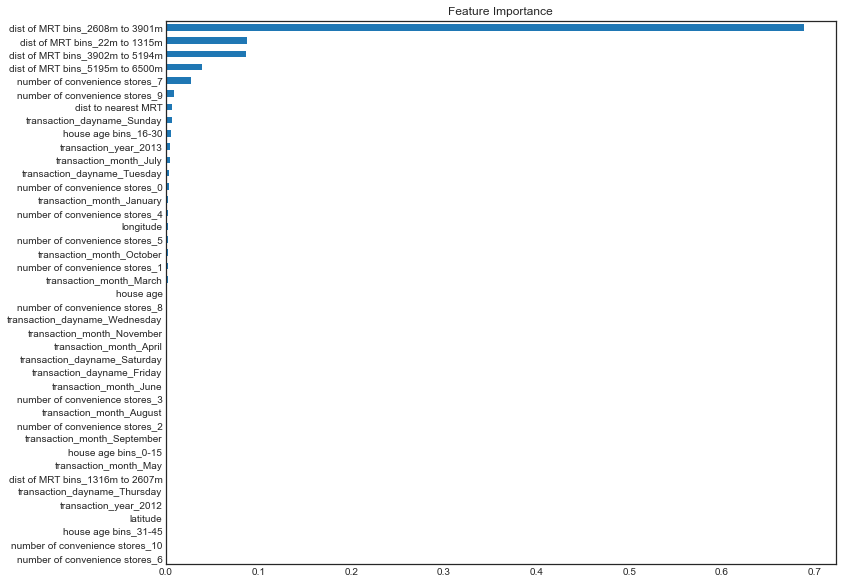

In [55]:
pd.Series(imps, index=numeric_cols0).sort_values().plot(kind='barh', title='Feature Importance', figsize=(12, 10))

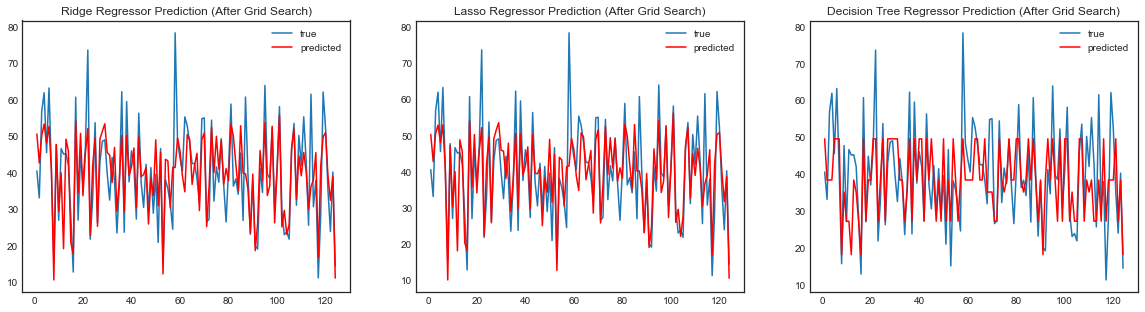

In [56]:
# a loop to compare how each model perdorm on the test set after **tuning**
plt.figure(figsize=(20, 5))
plt.subplot(1, 3,1)
plt.title('Ridge Regressor Prediction (After Grid Search)')
plt.plot(range(1, len(X_test)+1), y_test, label= 'true')
plt.plot(range(1, len(X_test)+1), search_pred0, color ='red', label= 'predicted')
plt.legend()

plt.subplot(1, 3,2)
plt.title('Lasso Regressor Prediction (After Grid Search)')
plt.plot(range(1, len(X_test)+1), y_test, label= 'true')
plt.plot(range(1, len(X_test)+1), search_pred1, color ='red', label= 'predicted')
plt.legend()

plt.subplot(1, 3,3)
plt.title('Decision Tree Regressor Prediction (After Grid Search)')
plt.plot(range(1, len(X_test)+1), y_test, label= 'true')
plt.plot(range(1, len(X_test)+1), search_pred2, color ='red', label= 'predicted')
plt.legend()

In [57]:
# saving the best models.
from joblib import dump

dump(search0, 'output/model.pkl')
dump(search1, 'output/model2.pkl')
dump(search2, 'output/model3(decision tree).pkl')

['output/model3(decision tree).pkl']

# Bayesian search approach

In [58]:
cat = ['transaction_year', 
       'transaction_month', 
       'transaction_dayname', 
       'number of convenience stores',
       'house age bins',
       'dist of MRT bins'
      ]
num = ['house age', 'dist to nearest MRT', 'latitude', 'longitude']

ohe = OneHotEncoder()
sc = StandardScaler()

col_trans = ColumnTransformer([('encoder', ohe, cat), 
                               ('scaler',sc, num)])

In [59]:
# tuning using bayesian method
import optuna
from optuna.samplers import TPESampler

def obj_fun(trial):
    
    max_depth= trial.suggest_int('max_depth', 1, 100)
    max_features= trial.suggest_int('max_features', 1, 20)
    max_leaf_nodes= trial.suggest_int('max_leaf_nodes', 2, 8)
    
    regr = DecisionTreeRegressor(max_depth=max_depth,
                                max_features=max_features,
                                max_leaf_nodes=max_leaf_nodes
                                )
    cat = ['transaction_year', 
           'transaction_month', 
           'transaction_dayname', 
           'number of convenience stores',
           'house age bins',
           'dist of MRT bins'
      ]
    num = ['house age', 'dist to nearest MRT', 'latitude', 'longitude']

    ohe = OneHotEncoder()
    sc = StandardScaler()

    col_trans = ColumnTransformer([('encoder', ohe, cat), 
                               ('scaler',sc, num)])

    pipe= Pipeline(steps=[('column_transformer', col_trans), ('regressor', regr)])
    
    pipe.fit(X_train, y_train)
    val_acc = pipe.score(X_test, y_test)
    
    return val_acc 

In [60]:
X_test.shape

(124, 10)

In [61]:
study= optuna.create_study(direction='maximize', sampler=TPESampler())
study.optimize(obj_fun, n_trials=100)
best_trail = study.best_trial.value

[I 2022-01-11 20:01:02,632] A new study created in memory with name: no-name-2a448ac5-36a8-48fe-8676-3721efd9e237
[I 2022-01-11 20:01:02,669] Trial 0 finished with value: 0.24522404058780511 and parameters: {'max_depth': 63, 'max_features': 18, 'max_leaf_nodes': 2}. Best is trial 0 with value: 0.24522404058780511.
[I 2022-01-11 20:01:02,694] Trial 1 finished with value: 0.5035763673267357 and parameters: {'max_depth': 48, 'max_features': 8, 'max_leaf_nodes': 5}. Best is trial 1 with value: 0.5035763673267357.
[I 2022-01-11 20:01:02,729] Trial 2 finished with value: 0.3339906496538567 and parameters: {'max_depth': 73, 'max_features': 8, 'max_leaf_nodes': 6}. Best is trial 1 with value: 0.5035763673267357.
[I 2022-01-11 20:01:02,764] Trial 3 finished with value: -0.0663004861987031 and parameters: {'max_depth': 94, 'max_features': 1, 'max_leaf_nodes': 3}. Best is trial 1 with value: 0.5035763673267357.
[I 2022-01-11 20:01:02,796] Trial 4 finished with value: 0.18045224717133013 and param

[I 2022-01-11 20:01:04,621] Trial 38 finished with value: 0.5743987950237719 and parameters: {'max_depth': 75, 'max_features': 15, 'max_leaf_nodes': 8}. Best is trial 8 with value: 0.6082544998784885.
[I 2022-01-11 20:01:04,682] Trial 39 finished with value: 0.519813517543759 and parameters: {'max_depth': 57, 'max_features': 10, 'max_leaf_nodes': 7}. Best is trial 8 with value: 0.6082544998784885.
[I 2022-01-11 20:01:04,733] Trial 40 finished with value: 0.5340037145675924 and parameters: {'max_depth': 100, 'max_features': 19, 'max_leaf_nodes': 4}. Best is trial 8 with value: 0.6082544998784885.
[I 2022-01-11 20:01:04,784] Trial 41 finished with value: 0.5386691562699124 and parameters: {'max_depth': 21, 'max_features': 17, 'max_leaf_nodes': 7}. Best is trial 8 with value: 0.6082544998784885.
[I 2022-01-11 20:01:04,843] Trial 42 finished with value: 0.5143671935917862 and parameters: {'max_depth': 14, 'max_features': 17, 'max_leaf_nodes': 7}. Best is trial 8 with value: 0.6082544998784

[I 2022-01-11 20:01:07,077] Trial 77 finished with value: 0.5731043791463807 and parameters: {'max_depth': 92, 'max_features': 13, 'max_leaf_nodes': 8}. Best is trial 69 with value: 0.6244294835185951.
[I 2022-01-11 20:01:07,127] Trial 78 finished with value: 0.46067980024272925 and parameters: {'max_depth': 98, 'max_features': 12, 'max_leaf_nodes': 8}. Best is trial 69 with value: 0.6244294835185951.
[I 2022-01-11 20:01:07,178] Trial 79 finished with value: 0.5579833877282694 and parameters: {'max_depth': 69, 'max_features': 13, 'max_leaf_nodes': 8}. Best is trial 69 with value: 0.6244294835185951.
[I 2022-01-11 20:01:07,233] Trial 80 finished with value: 0.47421408094961304 and parameters: {'max_depth': 61, 'max_features': 11, 'max_leaf_nodes': 7}. Best is trial 69 with value: 0.6244294835185951.
[I 2022-01-11 20:01:07,288] Trial 81 finished with value: 0.5880443550367171 and parameters: {'max_depth': 79, 'max_features': 15, 'max_leaf_nodes': 7}. Best is trial 69 with value: 0.624429

In [62]:
# best parameters
for k, v in study.best_trial.params.items():
    print(k, v)

max_depth 88
max_features 18
max_leaf_nodes 7


In [63]:
cat = ['transaction_year', 
       'transaction_month', 
       'transaction_dayname', 
       'number of convenience stores',
       'house age bins',
       'dist of MRT bins'
      ]
num = ['house age', 'dist to nearest MRT', 'latitude', 'longitude']

ohe = OneHotEncoder()
sc = StandardScaler()

col_trans = ColumnTransformer([('encoder', ohe, cat),  ('scaler',sc, num)])

final = Pipeline(steps=[('column_transformer', col_trans), ('regressor', 
                                                            DecisionTreeRegressor(max_depth=20, 
                                                                                  max_features=20,
                                                                                 max_leaf_nodes=8))])
final.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['transaction_year',
                                                   'transaction_month',
                                                   'transaction_dayname',
                                                   'number of convenience '
                                                   'stores',
                                                   'house age bins',
                                                   'dist of MRT bins']),
                                                 ('scaler', StandardScaler(),
                                                  ['house age',
                                                   'dist to nearest MRT',
                                                   'latitude',
                                                   'longitude'])])),
                ('regressor',
         

In [64]:
final.score(X_test, y_test)
fpred = final.predict(X_test)

In [65]:
search2.score(X_test, y_test)

-99.9681698354202

In [66]:
final.score(X_test, y_test)

0.45084025362589775

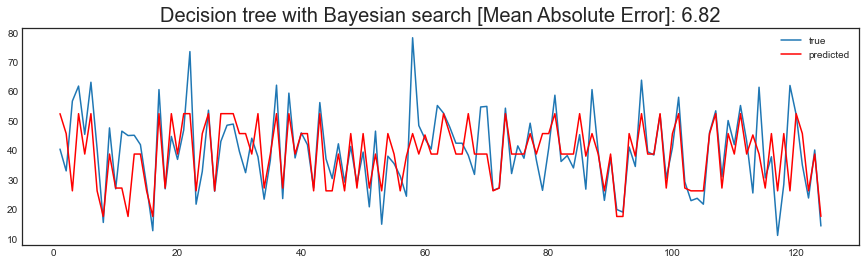

In [67]:
plt.figure(figsize=(15, 4))
plt.title('Decision tree with Bayesian search [Mean Absolute Error]: '\
          +str(np.round(mean_absolute_error(y_test, fpred),2)),size=20)

plt.plot(range(1, len(X_test)+1), y_test, label= 'true')
plt.plot(range(1, len(X_test)+1), fpred, color ='red', label= 'predicted')
plt.legend()

In [68]:
mean_squared_error(y_test, fpred)

94.40396729220025

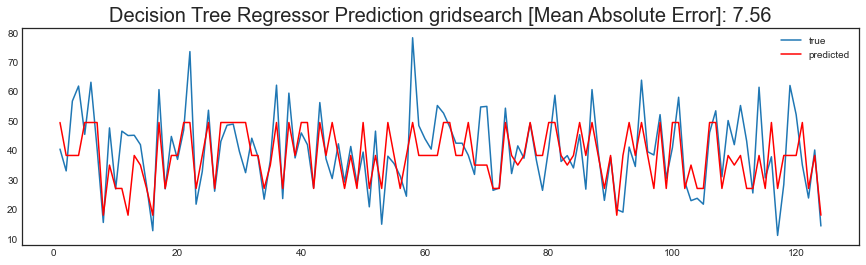

In [69]:
plt.figure(figsize=(15, 4))
plt.title('Decision Tree Regressor Prediction gridsearch [Mean Absolute Error]: '\
          +str(np.round(mean_absolute_error(y_test, search_pred2),2)),size=20)
plt.plot(range(1, len(X_test)+1), y_test, label= 'true')
plt.plot(range(1, len(X_test)+1), search_pred2, color ='red', label= 'predicted')
plt.legend()

In [70]:
mean_squared_error(y_test, search_pred2)

99.9681698354202

In [71]:
from joblib import dump
dump(final,'output/final_model.pkl')

['output/final_model.pkl']

In [72]:
# since linear regresion model will be the second model i will chose if decision tree regressor fails.
# 